<a href="https://colab.research.google.com/github/muratal49/CovidResearchAreas_LDA-TopicAnalysis/blob/main/NLP_LDA_Topic_Analysis_of_Corona_Reearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **MURAT AL**
 Prepared by myself. I worked on the project myself.


# Dataset Introduction



The **COVID-19 Open Research Dataset (CORD-19)** is a collection of over **1,000,000 scholarly articles**, including **400,000+ with full text**, covering **COVID-19, SARS-CoV-2, and related coronaviruses**. More details can be found here: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge

This dataset was created by the **White House** and leading research groups to support the global research community in **applying AI and NLP techniques** for new insights in the fight against COVID-19. Given the rapid growth of coronavirus-related literature, **CORD-19 helps researchers stay updated** with the latest scientific developments.

Here, we have selected a sample of 21000 articles for this assignment.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/NLP_Project1/CORD19-research-challenge.csv'  # Assuming your file is in 'MyDrive'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,cord_uid,abstract,journal,year
0,c33kud4e,BACKGROUND: Evidence about the impact of syste...,BMJ Open,2021
1,czuphb4p,INTRODUCTION: Some empirical studies have iden...,BMJ Open,2021
2,cuo9jcqc,ObjectivesThe COVID-19 pandemic has presented ...,BMJ Open,2021
3,cesz0wi3,OBJECTIVES: To determine if obesity and diabet...,BMJ Open,2021
4,e5tw2siw,INTRODUCTION: The reduction of coercion in psy...,BMJ Open,2022


# Text Preprocessing

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    """
    Preprocesses the input text by performing the following steps:
    1. Converts text to lowercase.
    2. Removes special characters and numbers.
    3. Tokenizes the text (TODO: You need to implement tokenization).
    4. Removes stopwords (TODO: You need to define stopwords and filter them out).
    5. Lemmatizes the tokens (TODO: You need to apply lemmatization).
    6. Joins the tokens back into a single string.

    HINT: You may find the following imports helpful:
        from nltk.tokenize import word_tokenize
        from nltk.stem import WordNetLemmatizer

    Parameters:
    text (str): The input text to preprocess.

    Returns:
    str: The cleaned and preprocessed text.
    """

    # Lowercase the text
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # TODO: Tokenize the text
    tokens = word_tokenize(text)  # Replace with word_tokenize(text)

    # TODO: Define stopwords and remove them
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # TODO: Apply lemmatization to tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Replace with WordNetLemmatizer().lemmatize(word) for each word

    # Join tokens back into a single string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the abstract column
df['processed_abstract'] = df['abstract'].apply(preprocess_text)

In [ ]:
df.head(2)

,cord_uid,abstract,journal,year,processed_abstract
0,c33kud4e,BACKGROUND: Evidence about the impact of syste...,BMJ Open,2021,background evidence impact systematic nursing ...
1,czuphb4p,INTRODUCTION: Some empirical studies have iden...,BMJ Open,2021,introduction empirical study identified associ...


In [ ]:
#the lemmeatized version looks like this below:
df.processed_abstract[0][:200]

'background evidence impact systematic nursing surveillance risk acute deterioration patient covid effect care complexity factor inpatient outcome scarce aim study determine association acute deteriora'

# LDA



📌 What is a Document-Term Matrix (DTM)?

A **DTM** is a matrix where:  
- **Rows** represent documents (text samples).  
- **Columns** represent unique words (features).  
- **Values** represent the frequency (count) of words in each document.  

---

## 📝 Example:

### **Documents**
1️⃣ **Doc 1:** `"machine learning is amazing"`  
2️⃣ **Doc 2:** `"deep learning is powerful"`  
3️⃣ **Doc 3:** `"machine learning and deep learning"`  

### **DTM Representation**
|             | and | deep | is | learning | machine | powerful | amazing |
|-------------|----|------|----|----------|---------|----------|---------|
| **Doc 1**  |  0  |  0   |  1  |    1     |   1     |    0     |    1    |
| **Doc 2**  |  0  |  1   |  1  |    1     |   0     |    1     |    0    |
| **Doc 3**  |  1  |  1   |  0  |    2     |   1     |    0     |    0    |

---

## 📌 How DTM Works:
1️⃣ **Extract Unique Words** (Vocabulary):  
   `{ 'machine', 'learning', 'deep', 'is', 'powerful', 'amazing', 'and' }`  

2️⃣ **Count How Many Times Each Word Appears in Each Document**  
   - "learning" appears **once** in Doc 1, **once** in Doc 2, and **twice** in Doc 3.  
   - "deep" appears **once** in Doc 2 and **once** in Doc 3.  
   - "and" appears **only in Doc 3**.  

3️⃣ **Create the Matrix**  
   - Each row represents a **document**.  
   - Each column represents a **word count**.  

---

## 📌 Definition of DTM:
A **Document-Term Matrix (DTM)** is a structured representation of text data where:
- **Rows correspond to documents (text samples).**
- **Columns correspond to unique words from the corpus.**
- **Each cell contains the number of times a word appears in a document.**

DTMs are widely used in **Natural Language Processing (NLP)** tasks like **text classification, topic modeling, and sentiment analysis**.

---

In the vectorizer the parameters are set as follows:

*   **stop_words='english'** → Removes common English stop words like "the," "is," "and," etc.
*   **max_df=0.95**→ Ignores words that appear in more than 95% of documents (too common, likely uninformative).
*   **min_df=2** → Ignores words that appear in fewer than 2 documents (too rare, likely noise)





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# TODO: Initialize CountVectorizer with appropriate parameters
vectorizer =  CountVectorizer(stop_words='english', max_df=0.95, min_df=2)

# TODO: Transform the processed abstracts
dtm = vectorizer.fit_transform(df['processed_abstract'])

feature_names = vectorizer.get_feature_names_out()

In [ ]:
feature_names

array(['aa', 'aaa', 'aablack', ..., 'zwitterionic', 'zygomycetes', 'zzm'],
      dtype=object)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


# TODO: Experiment with different Numbers of topics
#We set the number of topics to an intial value:
n_topics = 3

# TODO: Initialize the LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

lda.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

# Topics Visualization

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

def display_lda_wordcloud(lda_model, feature_names, num_words=10, topic_index=None):
    """
    Generates and displays WordClouds for LDA topics.

    Parameters:
    lda_model: Trained LDA model from sklearn
    feature_names: List of feature names from CountVectorizer
    num_words: Number of top words to display per topic
    topic_index: (Optional) Index of a specific topic to display. If None, all topics are shown.
    """

    # Get number of topics
    n_topics = lda_model.n_components

    # If a specific topic index is provided, display only that topic
    if topic_index is not None:
        if topic_index < 0 or topic_index >= n_topics:
            raise ValueError(f"Invalid topic_index {topic_index}. Must be between 0 and {n_topics - 1}.")
        topics_to_show = [topic_index]
    else:
        topics_to_show = range(n_topics)  # Display all topics

    fig, axes = plt.subplots(len(topics_to_show), 1, figsize=(6, 4 * len(topics_to_show)))
    if len(topics_to_show) == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, ax in zip(topics_to_show, np.atleast_1d(axes)):
        # Extract top words for the topic
        topic_words = lda_model.components_[i]  # Get word importance scores
        top_word_indices = topic_words.argsort()[-num_words:]  # Get indices of top words

        # Create a dictionary mapping words to their weights
        topic_dict = {feature_names[j]: topic_words[j] for j in top_word_indices}

        # Generate WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_dict)

        # Display
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(f"Topic {i+1}", fontsize=24, fontweight='bold', color='blue', style='italic')

    plt.tight_layout()
    plt.show()

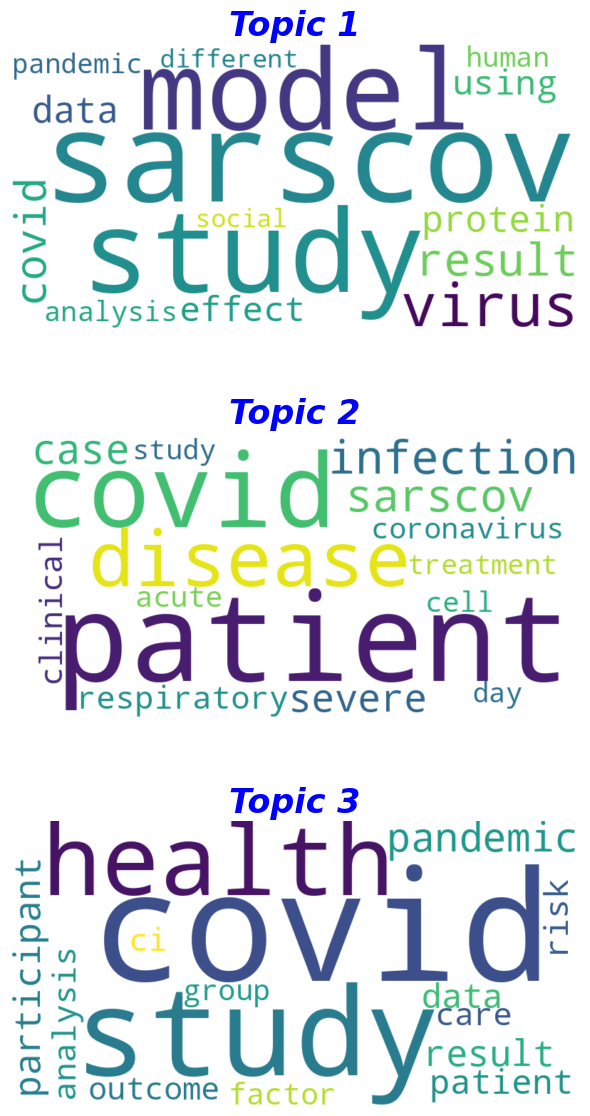

In [ ]:
# ✅ Example Usage:
# Display all topics
display_lda_wordcloud(lda, feature_names,15)

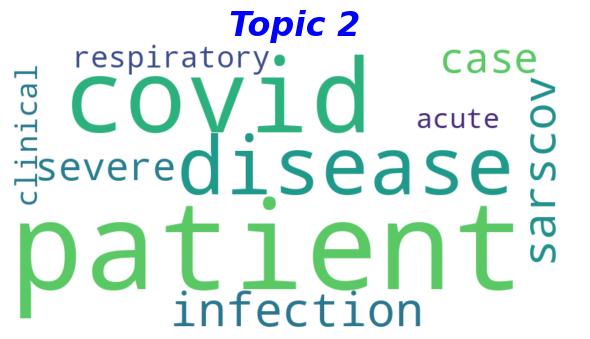

In [ ]:
# ✅ Example Usage:

# Display only topic 2 (index starts from 0, so topic 2 is index 1)
display_lda_wordcloud(lda, feature_names, topic_index=1)

# 🔍 Exploring Focus Across Years and Journals


The dataset includes a **`year`** column (publication year) and a **`journal`** column (source of publication), allowing you to analyze **how research topics have evolved over time and across different journals**.

## 📌 Key Questions to Investigate:
### **1️⃣ Are there differences in research focus among journals?**
- 🏢 **Do certain journals specialize in specific topics?**  
  - Example: Some journals might focus on **clinical trials**, while others emphasize **epidemiology** or **AI-driven research**.  

- 📊 **Use Topic Modeling (LDA) to group research papers into topics and compare across journals.**  

In [ ]:
"""
TODO: You need to transform the document-term matrix (DTM) using the LDA model
      and assign the dominant topic to each document.

HINT: You may find the following method helpful:
    lda.transform(dtm)  →  Returns the topic distribution for each document.
"""

# TODO: Transform the document-term matrix with the LDA model to get topic distributions
topic_distributions = lda.transform(dtm)

# TODO: Assign the dominant topic to each document
df['dominant_topic'] = topic_distributions.argmax(axis=1)

In [ ]:
topic_distributions[:2]

array([[0.00216701, 0.13697977, 0.86085322],
       [0.00261218, 0.00251157, 0.99487625]])

In [ ]:
df.head(3)

,cord_uid,abstract,journal,year,processed_abstract,dominant_topic
0,c33kud4e,BACKGROUND: Evidence about the impact of syste...,BMJ Open,2021,background evidence impact systematic nursing ...,2
1,czuphb4p,INTRODUCTION: Some empirical studies have iden...,BMJ Open,2021,introduction empirical study identified associ...,2
2,cuo9jcqc,ObjectivesThe COVID-19 pandemic has presented ...,BMJ Open,2021,objectivesthe covid pandemic presented unprece...,2





### **2️⃣ Are there differences in research focus among years?**
- 📅 **How did research priorities shift over time?**  
  - Did **early COVID-19 research** focus on **virology**, while later studies explored **vaccines, treatments, and long-term effects**?  
- 📈 **Which topics gained traction in different years?**  
  - Example: In **2020**, papers might have emphasized **disease transmission**, while in **2021+, vaccine efficacy studies** became dominant.  
- 🚀 **Visualize topic distributions over the years using LDA, word clouds, or trend analysis.**  


📊 **Get started with exploratory data analysis and uncover how COVID-19 research evolved over time!** 🚀  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_topic_trends(df):
    """
    Visualizes topic distribution over years and journals.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'year', 'journal', and 'dominant_topic' columns.
    """

    ##  Topic Distribution Among Journals
    plt.figure(figsize=(12, 6))
    journals = df['journal'].to_list()
    sns.countplot(data=df[df['journal'].isin(journals)], x='journal', hue='dominant_topic', palette='magma')
    plt.xticks(rotation=90)
    plt.xlabel("Journal")
    plt.ylabel("Number of Papers")
    plt.title("Topic Distribution Among Journals (Top 10)")
    plt.legend(title="Topics")
    plt.show()

    ##  Topic Trends Over Time (Line Chart)
    topic_year_trend = df.groupby(['year', 'dominant_topic']).size().reset_index(name='count')
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=topic_year_trend, x='year', y='count', hue='dominant_topic', palette='tab10', marker='o')
    plt.xlabel("Year")
    plt.ylabel("Number of Papers")
    plt.title("Topic Trends Over Time")
    plt.legend(title="Topics")
    plt.show()

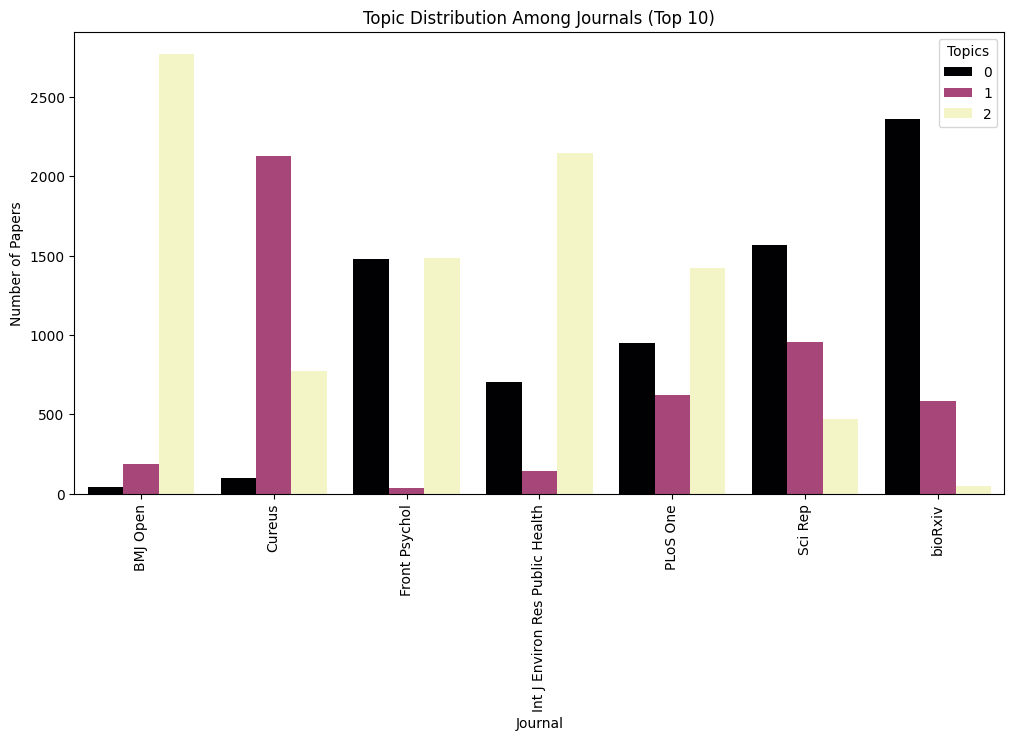

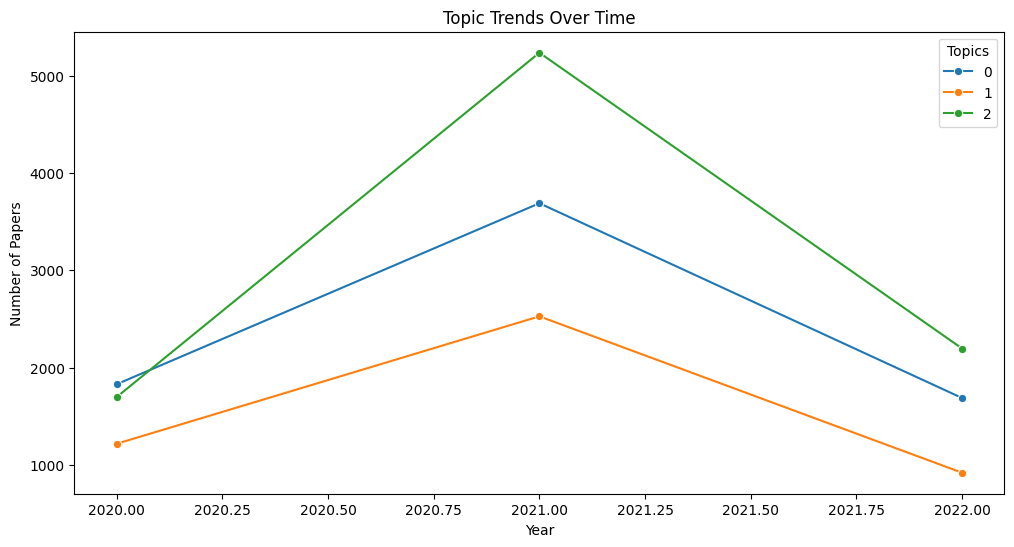

In [ ]:
visualize_topic_trends(df)